In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
os.chdir('../../data/')

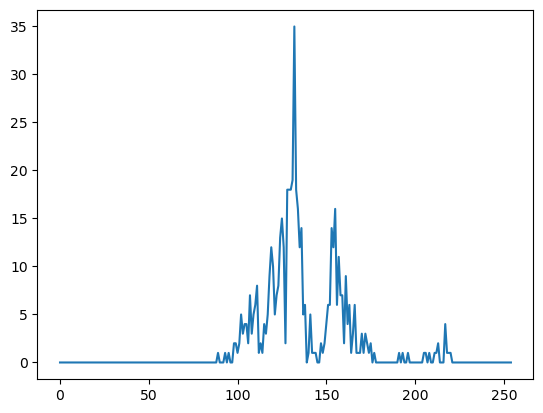

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/ahmedcr7/.local/lib/python3.11/site-packages/cv2/qt/plugins"


In [3]:
img = cv2.imread('lena.jpg',0)
# img = np.zeros((500,500),np.uint8)
# cv2.rectangle(img,(0,250),(500,500),(255),-1)
# cv2.rectangle(img,(0,125),(250,250),(127),-1)
# b, g, r = cv2.split(img)
# cv2.imshow('b',b)
# cv2.imshow('g',g)
# cv2.imshow('r',r)

# ravel() function is used to flatten the image array
# plt.hist(img.ravel(),255,[0,255]) # img, 255 is the number of bins, [0,255] is the range
# plt.hist(b.ravel(),255,[0,255])
# plt.hist(g.ravel(),255,[0,255])
# plt.hist(r.ravel(),255,[0,255])

hist = cv2.calcHist(img,[0],None,[255],[0,255]) # img, num of channel [0] if it gray [0,1,2] if it rgb, mask, max, range

plt.plot(hist)
plt.show()
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Histogram Equalization and Adaptive Histogram Equalization (CLAHE)

#### Histogram Equalization

Histogram Equalization is a technique in image processing used to enhance the contrast of an image. It works by redistributing the image's intensity levels, ensuring that all intensity levels are equally represented.

**Steps for Histogram Equalization:**
1. **Calculate the Histogram**: Determine the frequency of each pixel intensity in the image.
2. **Calculate the Cumulative Distribution Function (CDF)**: The CDF represents the cumulative sum of the histogram.
3. **Normalize the CDF**: Scale the CDF so that the output intensities cover the full range of pixel values.
4. **Map Original Intensities to New Intensities**: Adjust the pixel values based on the normalized CDF, effectively stretching the image's contrast.


### CLAHE (Contrast Limited Adaptive Histogram Equalization)

CLAHE is an advanced version of Histogram Equalization that works locally rather than globally. It divides the image into smaller regions (tiles) and applies histogram equalization to each tile individually. This helps to avoid over-enhancement of noise in homogeneous areas.

#### How CLAHE Works:
1. The image is divided into small tiles (regions).
2. Histogram equalization is applied to each tile separately.
3. The histograms are limited to a maximum value (clip limit) to prevent over-enhancement.
4. The neighboring tiles are then combined smoothly.

#### Benefits of CLAHE:
- **Local Contrast Enhancement**: By enhancing contrast in small regions, CLAHE avoids over-enhancing noise in uniform areas.
- **Better Noise Handling**: Unlike global histogram equalization, CLAHE reduces the risk of noise amplification.
- **Adaptive Enhancement**: CLAHE adapts to different regions of the image, making it more effective for images with varying lighting conditions.

#### Limitations of CLAHE:
- **Computational Complexity**: It can be computationally intensive compared to global histogram equalization.
- **Parameter Sensitivity**: The effectiveness of CLAHE depends on the choice of clip limit and tile grid size, requiring tuning for optimal results.

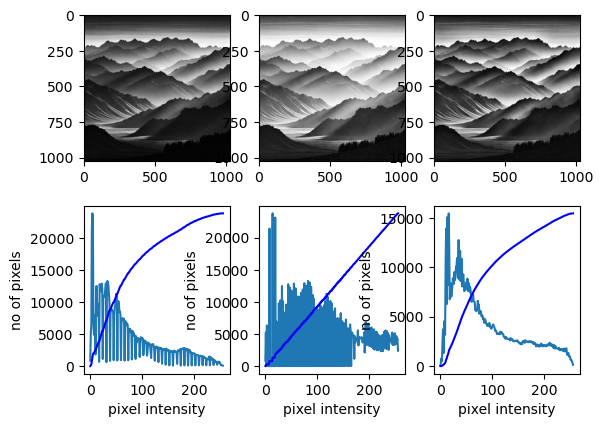

In [4]:
def histogram_equalization():
    img = cv2.imread('./histogram_equalization_image.webp',0)
    
    hist = cv2.calcHist([img],[0],None,[256],[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max())/ cdf.max()
    plt.figure()
    plt.subplot(231)
    plt.imshow(img,cmap='gray')
    plt.subplot(234)
    plt.plot(hist)
    plt.plot(cdf_normalized,color='b')
    plt.xlabel('pixel intensity')
    plt.ylabel('no of pixels')


    eq = cv2.equalizeHist(img)
    eq_hist = cv2.calcHist([eq],[0],None,[256],[0,256])
    eq_cdf = eq_hist.cumsum()
    eq_cdf_normalized = eq_cdf * float(eq_hist.max())/ eq_cdf.max()
    plt.subplot(232)
    plt.imshow(eq,cmap='gray')
    plt.subplot(235)
    plt.plot(eq_hist)
    plt.plot(eq_cdf_normalized,color='b')
    plt.xlabel('pixel intensity')
    plt.ylabel('no of pixels')


    clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
    clahe_img = clahe.apply(img)
    clahe_hist = cv2.calcHist([clahe_img],[0],None,[256],[0,256])
    clahe_cdf = clahe_hist.cumsum()
    clahe_cdf_normalized = clahe_cdf * float(clahe_hist.max())/ clahe_cdf.max()
    plt.subplot(233)
    plt.imshow(clahe_img,cmap='gray')
    plt.subplot(236)
    plt.plot(clahe_hist)
    plt.plot(clahe_cdf_normalized,color='b')
    plt.xlabel('pixel intensity')
    plt.ylabel('no of pixels')


    plt.show()
if __name__ == "__main__":
    histogram_equalization()